<a href="https://colab.research.google.com/github/devkyle4/Machine-Learning/blob/main/COCOA_STOCK_PRICE_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance 

In [ ]:
import pandas as pd 
import numpy as np

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stocks = input("Enter the code of the stock: ")
df = yf.download(stocks,"2008-01-01", "2021-12-31", auto_adjust=True)
df.head()

Enter the code of the stock: CC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,2028.0,2105.0,2028.0,2097.0,10055
2008-01-03,2097.0,2141.0,2081.0,2120.0,11139
2008-01-04,2120.0,2125.0,2078.0,2098.0,9298
2008-01-07,2097.0,2164.0,2093.0,2131.0,8050
2008-01-08,2131.0,2176.0,2131.0,2156.0,10134


In [ ]:
df.shape

(3523, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3523 entries, 2008-01-02 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3523 non-null   float64
 1   High    3523 non-null   float64
 2   Low     3523 non-null   float64
 3   Close   3523 non-null   float64
 4   Volume  3523 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.1 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,2618.300312,2642.693727,2593.117230,2617.212319,9397.943798
std,386.240194,386.985523,385.111704,385.717656,9505.502560
min,1780.000000,1780.000000,1769.000000,1780.000000,0.000000
25%,2314.500000,2334.500000,2297.000000,2314.500000,15.000000
50%,2592.000000,2620.000000,2558.000000,2587.000000,8051.000000
75%,2925.000000,2950.000000,2903.000000,2924.500000,16428.500000
max,3807.000000,3826.000000,3807.000000,3774.000000,45041.000000


Text(0.5, 1.0, 'CC=F,')

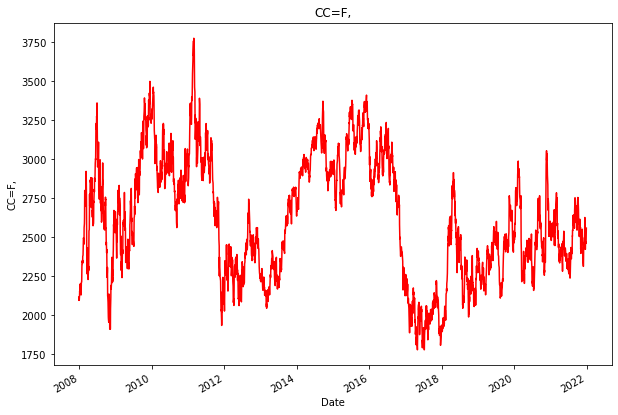

In [ ]:
df.Close.plot(figsize=(10,7), color='r')
plt.xlabel("Date")
plt.ylabel('{},'.format(stocks))
plt.title('{},'.format(stocks))

In [ ]:
compression_opts = dict(method='zip',archive_name='out.csv')
df.to_csv('out.zip',index=False, compression = compression_opts)

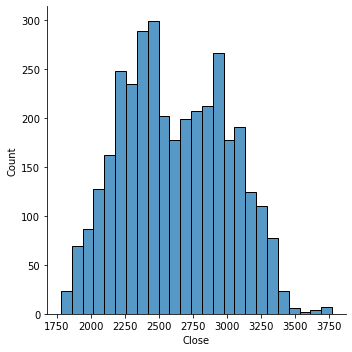

In [ ]:
sns.displot(df["Close"])

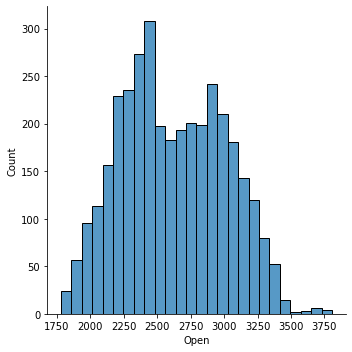

In [ ]:
sns.displot(df["Open"])

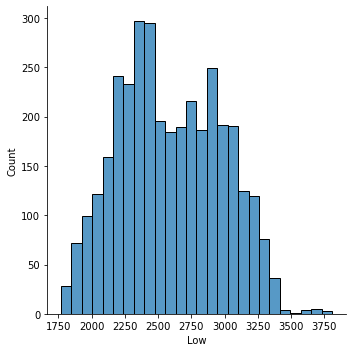

In [ ]:
sns.displot(df["Low"])

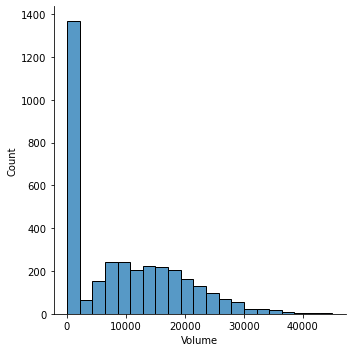

In [ ]:
sns.displot(df["Volume"])

In [ ]:
# Deductions  

# - Shape of the data  
# - how our data is distributed 
# - It's very very non linear  

# models that can be used: Linear, Logis, Regularized, SVM 

X = df.drop("Close", axis=1) 
y = df["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=42) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2642, 4)
(881, 4)
(2642,)
(881,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction1 = lr.predict(X_test)

In [ ]:
#Drawing a linear Regression Graph
plt.plot.line(X_train,y_train[])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

def calculate_metrics(y_test,y_pred):
    
    '''
      groundTruth: y_test
      predictedValues: y_pred
    '''
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2)
    
calculate_metrics(y_test,prediction1)

MSE:-  342.8911558474752
RMSE:-  18.51732042838475
R2_score:-  0.9976244290218976


In [ ]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182766.63231383963, tolerance: 39677.970729182445
  model = cd_fast.enet_coordinate_descent(


In [ ]:
calculate_metrics(y_test, la_predict)

MSE:-  343.25041889791646
RMSE:-  18.527018618707018
R2_score:-  0.9976219400254287


In [ ]:
calculate_metrics(y_test, ri_predict)

MSE:-  342.8912286370059
RMSE:-  18.517322393829133
R2_score:-  0.9976244285176074


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   1.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.017 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.007 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.017 total time=   1.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.008 total time=   1.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   1.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.007 total time=   1.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.011 total time=   1.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.011 total time=   1.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.016 total time=   0.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.073 total time=   1.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.055 total time=   1.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.051 total time=   1.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.062 total time=   1.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.078 total time=   1.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.193 total time=   2.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.177 total time=   2.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.190 total time=   2.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [ ]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")